# Best practices in data visualization - ASPP 2022, Bilbao
## Exercise 2 - Which visualization should I use? 

In this exercise you get a dataset of the human development index (HDI) for different countries around the world over the years. The HDI is a measure of 'how developed' a country is. It depends on how rich the country is, but also on other factors such as life expectancy and education. This dataset contains several other variables that are interesting and could relate somehow to the HDI. **Your job is to visualize possible relationships and in this way answer some questions (see below)**. 

Here a short description of each column in the dataset

- *Country, Year*, Region are self-explanatory
- *GDP per capita*: gross domestic product of a country per inhabitant. It is considered a measure of how rich a country is.
- *Expenditure on health/education/social protection*: percentage of public spending destined to those sectors
- *HDI*: human development index
- *Code*: three letter country code
- *Global*: Whether the country belongs to the so called 'Global North' or 'Global South'

Note that this dataset is incomplete as it does not contain data of *all* the countries in the world.

Sources: [ourworldindata.org](https://ourworldindata.org/human-development-index)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib comes alread with a set of stylesheets. 
# here we use one of the default sheets from *seaborn*, another python visualization library based on matplotlib.
# for more styles see: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-darkgrid')

In [2]:
# we use pandas to read the dataset on a table
df = pd.read_csv('data/hdi_data.csv')
df

,Country,Year,Expenditure on health,Expenditure on education,Expenditure on social protection,HDI,Code,GDP per capita,Region,Global
0,Afghanistan,2006,1.387150,4.684761,0.887695,0.429,AFG,1315.789063,Asia & Pacific,Global South
1,Afghanistan,2007,2.376418,4.174895,1.357564,0.447,AFG,1460.825806,Asia & Pacific,Global South
2,Afghanistan,2008,2.313319,4.383672,1.787371,0.447,AFG,1484.114502,Asia & Pacific,Global South
3,Afghanistan,2009,2.222690,4.810640,1.211468,0.460,AFG,1758.904419,Asia & Pacific,Global South
4,Afghanistan,2010,2.562634,5.383646,5.380668,0.472,AFG,1957.029053,Asia & Pacific,Global South
...,...,...,...,...,...,...,...,...,...,...
1070,Uzbekistan,2015,2.365495,5.660089,6.987072,0.701,UZB,6401.115234,Asia & Pacific,Global South
1071,Uzbekistan,2016,2.284768,5.567202,6.612210,0.705,UZB,6663.949707,Asia & Pacific,Global South
1072,Uzbekistan,2017,2.137274,5.079615,6.158300,0.713,UZB,6840.709961,Asia & Pacific,Global South
1073,Uzbekistan,2018,2.215873,5.162037,6.040904,0.717,UZB,7082.925293,Asia & Pacific,Global South


#### How to get data from one column

In [3]:
# You can get the values of one column in this way, returning a numpy array
df['GDP per capita'].values

array([1315.789063, 1460.825806, 1484.114502, ..., 6840.709961,
       7082.925293, 7348.146973])

In [4]:
# for the categorical variables you can get it also as a numpy array, of type 'object'
df['Country'].values

array(['Afghanistan', 'Afghanistan', 'Afghanistan', ..., 'Uzbekistan',
       'Uzbekistan', 'Uzbekistan'], dtype=object)

#### How to filter data 

In [7]:
# you can filter the data in this way. Say you are only interested in country 'Germany'. Then you select 
# only the rows where that is true with df[df['colname'] == value]
italy_df = df[df['Country']=='Italy']

## Exercises

### A: How is the HDI distributed? normally distributed, or skewed?

### B: Is there a relationship between GDP per capita and HDI? is this relationship different for different regions of the world? 


### C: Is expenditure on education or health correlated with the HDI *and* GDP?

Can you visualize the three variables at once? (HDI, GDP and % expenditure in health/education).

First think (even better, make a sketch) of the different possibilities you have. Then implement the one you think its clearer here below.

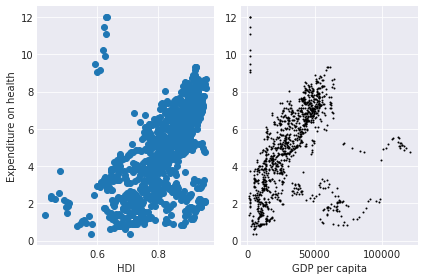

In [25]:
fig, axs = plt.subplots(1,2)

ax = axs[0]
ax.scatter(df['HDI'], df['Expenditure on health'])
ax.set_xlabel('HDI')
ax.set_ylabel('Expenditure on health')

ax = axs[1]
ax.scatter(df['GDP per capita'], df['Expenditure on health'], c='k', s=1)
ax.set_xlabel('GDP per capita')
# ax.set_ylabel('Expenditure on health')

plt.tight_layout()

#calculate equation for trendline
z = np.polyfit(df['GDP per capita'], df['Expenditure on health'], 1)
p = np.poly1d(z)

#add trendline to plot
ax.plot(df['GDP per capita'], p(df['GDP per capita']))


### D: are countries getting richer, i.e. is their GDP growing over time? 

You can visualize some countries relevant for you, or randomly pick some, say ten of them.


### E: According to this dataset, which is - on average - the less developed region? Visualize the fact that the Global North is more developed than the Global South.

Consider that your message is simple, comparing regions. Which kind of plot is better at comparing categorial entities?